# 실습 1. 접평면 그리기

In [12]:
import numpy as np
import matplotlib.pyplot as plt

DELTA_X = 1e-5

def partial_derivative(f, tan_point, h=DELTA_X):
    x, y = tan_point
    df_dx = (f(x + h, y) - f(x, y)) / h
    df_dy = (f(x, y + h) - f(x, y)) / h
    return df_dx, df_dy

def plot_tan_plane(f,tan_point,interval):
    x_space = np.linspace(*interval, 100)
    y_space = np.linspace(*interval, 100)
    X, Y = np.meshgrid(x_space, y_space)
    Z = f(X, Y)
    
    # derivative
    df_dx, df_dy = partial_derivative(f, tan_point)
    tan_plane = f(tan_point[0], tan_point[1]) + df_dx * (X - tan_point[0]) + df_dy * (Y - tan_point[1])
    
    # Create separate 3D plots for each function
    fig = plt.figure(figsize=(12, 6))

    # plot    
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax1.plot_surface(X, Y, tan_plane, cmap='Reds', alpha=0.5)
    ax1.scatter(tan_point[0], tan_point[1], f(tan_point[0], tan_point[1]), marker='s', color='black', s=10)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    
    plt.tight_layout()
    plt.show()

In [20]:
def func(x,y):
    return x**2 + y**2
    # return -(x)**4 -(y)**4 + (x)**2 + y**2 +(x*y)**2

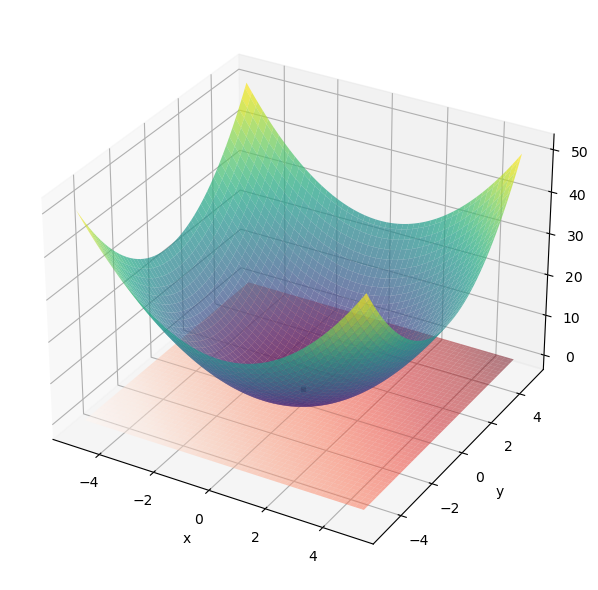

In [21]:
# x**2 + y**2
plot_tan_plane(func, (0,0), (-5, 5))

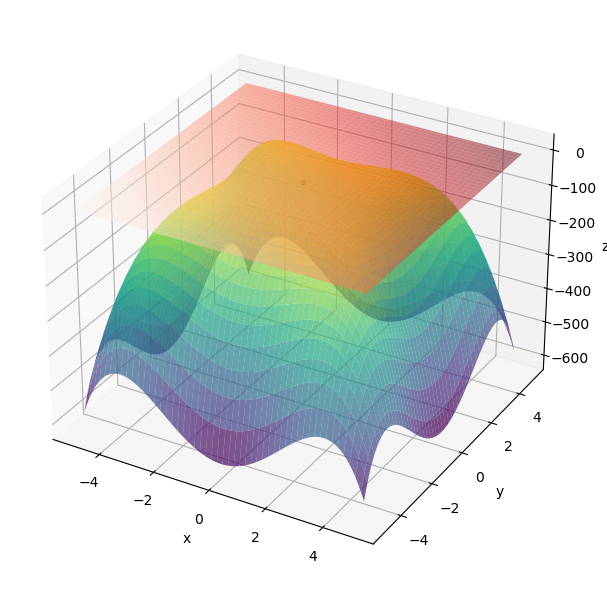

In [18]:
# -(x)**4 -(y)**4 + (x)**2 + y**2 +(x*y)**2
plot_tan_plane(func, (0,0), (-5, 5))

# 2. 최적화 문제

In [42]:
def func(x,y):
    return -x**4-y**4+x**3+3*x**2+y**2+(x*y)**2

In [109]:
EPSILON=1e-7

def gradient_ascent(xy_start):
    attempts = 10
    best_performance = 0
    
    for _ in range(attempts):        
        x = np.random.uniform(-3, 3)
        y = np.random.uniform(-3, 3)

        lr = 0.01
        max_iterations = 10000

        for i in range(max_iterations):
            # 편미분
            df_dx, df_dy = partial_derivative(func, (x, y))

            # 업데이트
            x += lr * df_dx
            y += lr * df_dy

            current_value = func(x, y)
            
            if current_value > best_performance:
                best_x, best_y = x, y
                best_performance = current_value

            # 수렴 여부
            if abs(current_value - func(xy_start[0], xy_start[1])) < EPSILON:
                break
    
    return best_x, best_y

[best_xy] :  (2.1072715085761127, -1.6493372666850457)
[best_performance] :  10.360460743900681


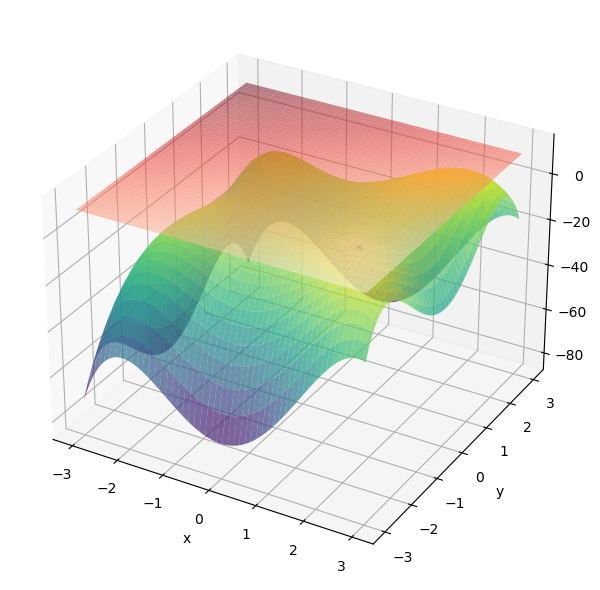

In [110]:
xy_start = (0,0)
best_xy = gradient_ascent(xy_start)

print('[best_xy] : ', best_xy)
print('[best_performance] : ', func(best_xy[0],best_xy[1]))
plot_tan_plane(func, best_xy, (-3, 3))

# 3. Hessian matrix를 구하고, local maximum인지 확인

In [114]:
# Assignment 3에서 구현한 determinant 함수를 사용
def determinant(matrix):
    n = len(matrix)
    det = 0
    
    if n == 2: return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    for i in range(n):
        sign = (-1) ** i
        
        submatrix = [row[:i] + row[i + 1:] for row in matrix[1:]] # 부분 행렬 생성
        det += sign * matrix[0][i] * determinant(submatrix) # 2이상의 행렬의 경우 재귀적으로 계산
    
    return det

In [139]:
# Hessian matrix
def HessianMatrix(func, variables, h=DELTA_X):
    n = len(variables)
    hessian = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            partial_derivative_ij = lambda x, y: partial_derivative(lambda x, y: partial_derivative(func, (x, y))[i], (x, y))[j]
            hessian[i, j] = partial_derivative_ij(variables[0], variables[1])
    return hessian

In [142]:
xy_start = (0,0)
hessian = HessianMatrix(func, gradient_ascent(xy_start))
hessian_determinant = determinant(hessian)

if hessian_determinant > 0:
    print("Best_x, best_y는 local maximum입니다.")
else:
    print("Best_x, best_y는 local maximum이 아닙니다.")

Best_x, best_y는 local maximum입니다.
